# Characterisic values

In this notebook you will learn the meaning of various characteristic values, and how to calculate them.

In [1]:
import matplotlib.pyplot as plt
from statsmodels.tsa import seasonal
from datetime import datetime

from datascience.read import Era5, AscatDataH121, read_multiple_ds

%matplotlib widget

We will look at data from ASCAT and ERA5

In [2]:
era5 = Era5(read_bulk = False)
ascat = AscatDataH121(read_bulk = False)

In [3]:
lat = 48.198905
lon = 16.367182
gpi = era5.grid.find_nearest_gpi(lon, lat)[0]

In [4]:
ts = read_multiple_ds(loc=(lon, lat), ascat=ascat, era5=era5, ref_ds= "ascat")

ASCAT GPI: 1227274 - distance: 5527.400 m
ERA5 GPI: 240545 - distance: 10396.479 m


You can get the needed variables, and calculate indices with them:

In [5]:
t2m = ts["t2m_era5"]
tp = ts["tp_era5"]
ssm = ts["surface_soil_moisture"]

TCI is used to determine stress on vegetation caused by temperatures and excessive wetness. Conditions are estimated relative to the maximum and minimum temperatures and modified to reflect different vegetation responses to temperature. TCI varies from 0, for extremely unfavorable conditions to 1 for optimal conditions.

In [6]:
tci = (t2m.max()-t2m)/(t2m.max()-t2m.min())

PCI ranges from 0 to 1 corresponding to changes in precipitation from extremely unfavorable to optimal. In case of a meteorological drought which has an extremely low precipitation, the PCI is close or equal to 0, and at flooding conditions, the PCI is close to 1. 

In [7]:
pci = (tp-tp.min())/(tp.max()-tp.min())

SCI ranges from 0 to 1 corresponding to changes in soil moisture from extremely unfavorable to optimal. In case of a meteorological drought which has an extremely low soil moisture, the SCI is close or equal to 0, and at moisture saturation conditions, the SCI is close to 1.

In [8]:
sci = (ssm-ssm.min())/(ssm.max()-ssm.min())

You can also compare these indices visually: 

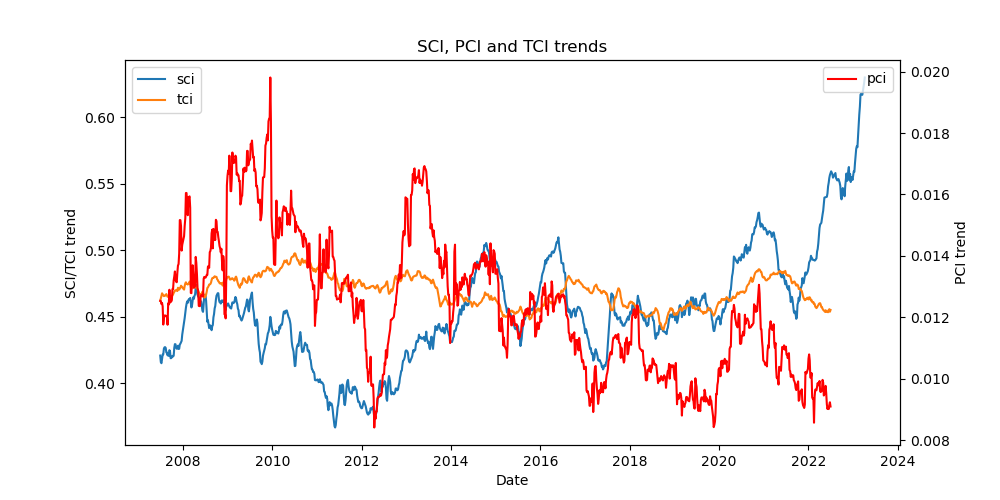

In [9]:
sci_resampled = sci.resample('5D').mean()
pci_resampled = pci.resample('5D').mean()
tci_resampled = tci.resample('5D').mean()

trend_sci = seasonal.seasonal_decompose(sci_resampled.dropna(), model="additive", period=73).trend
trend_pci = seasonal.seasonal_decompose(pci_resampled.dropna(), model="additive", period=73).trend
trend_tci = seasonal.seasonal_decompose(tci_resampled.dropna(), model="additive", period=73).trend

fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.plot(trend_sci, label="sci")
ax.plot(trend_tci, label="tci")
ax1 = ax.twinx()
ax1.plot(trend_pci, c="r", label="pci")
ax.set_title("SCI, PCI and TCI trends")
ax.set_ylabel("SCI/TCI trend")
ax1.set_ylabel("PCI trend")
ax.set_xlabel("Date")
ax.legend()
ax1.legend()

plt.show()

## SMADI/pytesmo

A package for calculating and analysing time-series Data is the SMADI library (https://github.com/MuhammedM294/smadi/tree/main)

In [10]:
from smadi import preprocess

You can calculate the mean daily value of a variable with the *compute_clim* function. But also other statistical values for various timeframes.

In [11]:
ts_smadi = preprocess.compute_clim(ts, "day", "surface_soil_moisture", ["mean"])
ts_smadi

,as_des_pass,swath_indicator,surface_soil_moisture,surface_soil_moisture_noise,backscatter40,slope40,curvature40,surface_soil_moisture_sensitivity,backscatter_flag,correction_flag,...,wetland_fraction,topographic_complexity,subsurface_scattering_probability,sat_id,sd,swvl1_era5,stl1_era5,t2m_era5,tp_era5,norm-mean
2007-01-01 19:24:42.814,0,0,71.779999,6.72,-7.349617,-0.091480,0.000601,2.933993,7,0.0,...,0,5,NaN,3,0.000000,0.304668,3.360138,9.525238,1.605600e-06,47.712692
2007-01-02 09:18:14.356,1,0,NaN,NaN,NaN,NaN,NaN,NaN,2,1.0,...,0,5,NaN,3,0.000000,0.301233,3.336334,5.222809,8.028001e-07,56.412628
2007-01-02 19:04:06.049,0,0,55.860001,6.75,-7.870332,-0.091474,0.000609,2.936791,7,0.0,...,0,5,NaN,3,0.000153,0.302752,3.485840,3.665436,4.015490e-05,56.412628
2007-01-03 20:23:28.700,0,1,48.869999,6.73,-8.100801,-0.091527,0.000615,2.939877,7,0.0,...,0,5,NaN,3,0.000000,0.306139,4.656189,5.037140,-1.862645e-09,51.594501
2007-01-04 08:36:49.040,1,1,60.529999,6.68,-7.724965,-0.091705,0.000628,2.947791,7,0.0,...,0,5,NaN,3,0.000000,0.304958,3.411102,4.128021,6.987154e-05,47.877895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-30 09:26:54.144,1,0,NaN,NaN,-7.370146,-0.098986,0.000859,2.884198,3,0.0,...,0,5,NaN,4,NaN,NaN,NaN,NaN,NaN,68.098885
2024-01-30 19:12:45.852,0,0,82.360001,6.95,-6.871718,-0.098986,0.000859,2.884198,7,0.0,...,0,5,NaN,4,NaN,NaN,NaN,NaN,NaN,68.098885
2024-01-30 20:05:35.610,0,1,NaN,NaN,-7.476925,-0.098986,0.000859,2.884198,3,0.0,...,0,5,NaN,5,NaN,NaN,NaN,NaN,NaN,68.098885
2024-01-31 08:18:52.567,1,1,NaN,NaN,NaN,NaN,NaN,NaN,2,1.0,...,0,5,NaN,5,NaN,NaN,NaN,NaN,NaN,47.524998


If you substract the soil moisture value from the daily mean you get deviations:

In [12]:
ts_smadi["dev"] = ts_smadi["surface_soil_moisture"]-ts_smadi["norm-mean"]

You can also show the deviations visually:

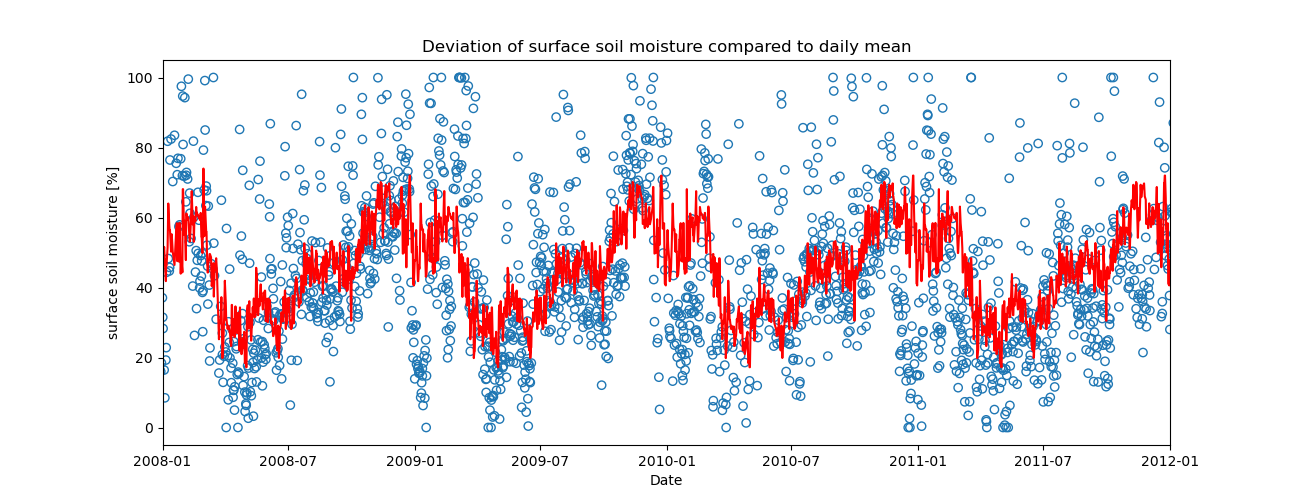

In [13]:
kwargs = {"facecolors": "None", "edgecolor": "C0"}

fig, ax = plt.subplots(figsize=(13,5))
ax.plot(ts_smadi["norm-mean"], c="r")
ax.scatter(ts_smadi.index, ts_smadi["surface_soil_moisture"], marker="o", **kwargs)
ax.set_title("Deviation of surface soil moisture compared to daily mean")
ax.set_xlabel("Date")
ax.set_ylabel("surface soil moisture [%]")
ax.set_xlim(datetime(2008,1,1), datetime(2012,1,1))

plt.show()

Alternatively you can use pytesmo (https://github.com/TUW-GEO/pytesmo/tree/master) to plot and calculate anomalies:

In [14]:
from pytesmo.time_series import plotting

In [15]:
ts_pytesmo = ts[["surface_soil_moisture", "swvl1_era5", "stl1_era5"]]

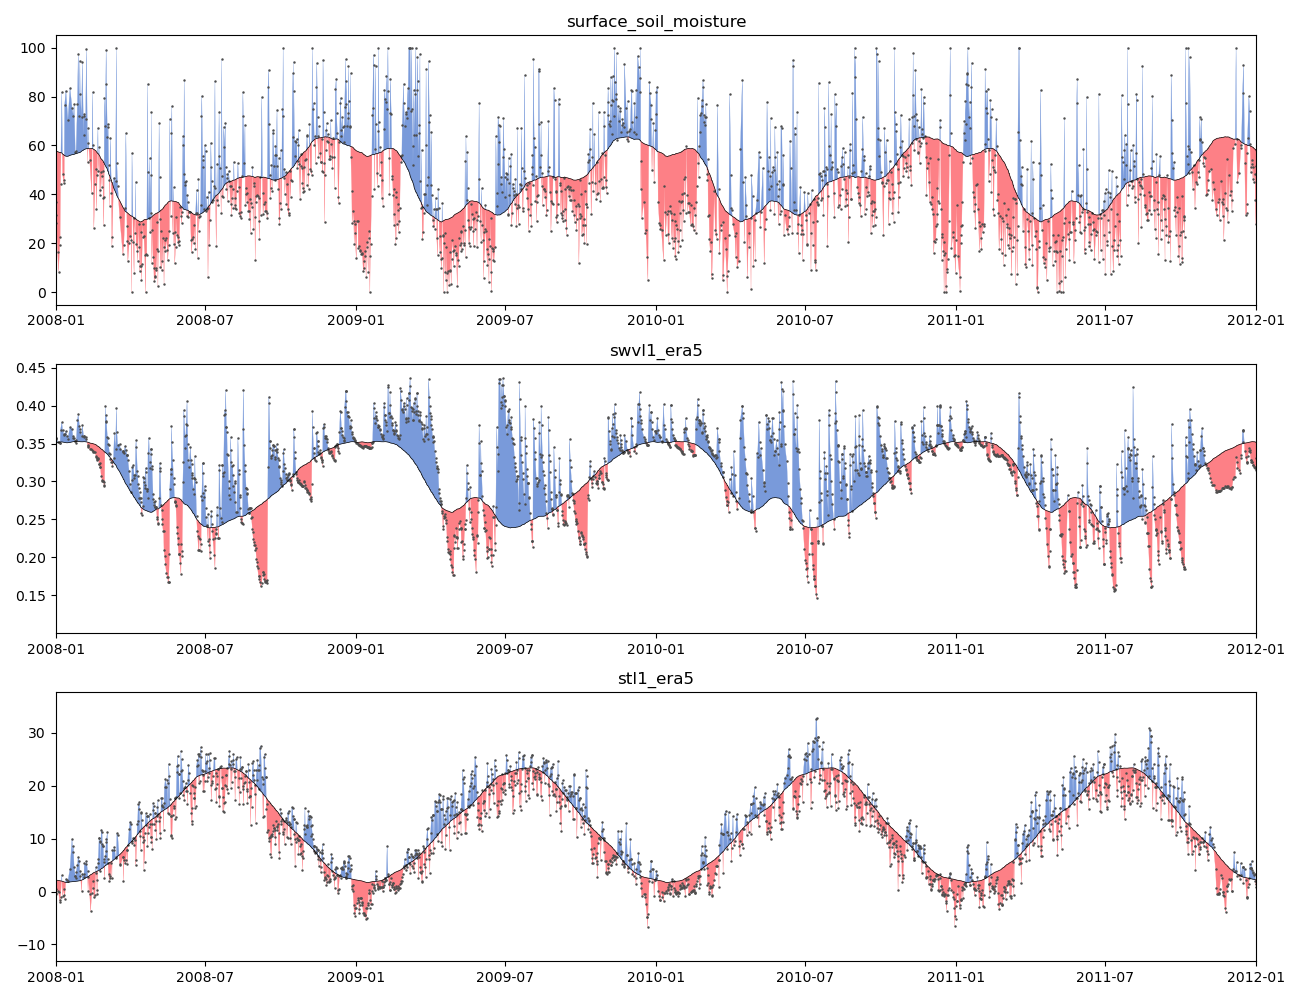

In [16]:
fig, axes = plt.subplots(3,1, figsize=(13,10))
plotting.plot_clim_anom(ts_pytesmo, axes=axes)
for ax in axes:
    ax.set_xlim(datetime(2008,1,1), datetime(2012,1,1))

plt.tight_layout()
plt.show()